#### Import Required Libraries
This cell imports essential Python libraries for data manipulation and numerical computations:

In [48]:
import pandas as pd
import numpy as np

#### Define Project and Data Paths

In [49]:
import os

abs_path = os.path.abspath("/Users/zazul/projects/work-scrape-analyze/")

data_path = os.path.join(abs_path, "data")
data_path

'c:\\Users\\zazul\\projects\\work-scrape-analyze\\data'

#### Load Job Listings Data
Reads IT job data from a `it_jobs.jl` file into a pandas DataFrame.

In [50]:
jobs_path = os.path.join(data_path, "it_jobs.jl")
df_jobs = pd.read_json(jobs_path, lines=True)
df_jobs

,job_id,job_url,title,job_data,requirements
0,6830785,https://www.work.ua/jobs/6830785/,Electronics Design Engineer,{'Дані про компанію': 'Renesas Electronics;IT;...,"[Python, C++, C#, SolidWorks, Ремонт електроні..."
1,4990187,https://www.work.ua/jobs/4990187/,Python developer,"{'Зарплата': '50000-100000 грн, + бонуси', 'Да...","[Користувач ОС Linux, Python, Grafana, Rust]"
2,6798289,https://www.work.ua/jobs/6798289/,Контент-менеджер (SMM),"{'Зарплата': '30000-35000 грн', 'Дані про комп...","[Впевненість, Дизайн, Продаж, Налаштування тар..."
3,6820897,https://www.work.ua/jobs/6820897/,Головний спеціаліст з ІТ,"{'Зарплата': '9880 грн, Доплати, премії, компе...","[Відповідальність, Пунктуальність, Комунікабел..."
4,6869140,https://www.work.ua/jobs/6869140/,SMM-менеджер (мобільний банкінг),"{'Дані про компанію': 'Ідея Банк;Фінанси, банк...","[Клієнт-Банк, Комунікабельність, Організованіс..."
...,...,...,...,...,...
5049,5160748,https://www.work.ua/jobs/5160748/,"Бізнес-аналітик 1С, керівник групи розробки ПЗ...",{'Дані про компанію': 'Pro Pharma;Хімічна пром...,"[Користувач 1С, Jira, Trello, Комунікабельніст..."
5050,6855421,https://www.work.ua/jobs/6855421/,Customer Support Specialist,"{'Дані про компанію': 'Zone3000, IT company;IT...","[Активність, Системне адміністрування, Адмініс..."
5051,6882196,https://www.work.ua/jobs/6882196/,Менеджер з IVR,{'Дані про компанію': 'DTEK;Енергетика; більше...,"[Комунікабельність, Відповідальність, Стресост..."
5052,5175666,https://www.work.ua/jobs/5175666/,SMM-менеджер,"{'Зарплата': '15000-45000 грн, Ставка залежить...","[SMM, Креативність, Ініціативність, Зйомка sto..."


#### Remove Unnecessary Column
Drops the `job_url` column from the DataFrame.


In [51]:
df_jobs = df_jobs.drop("job_url", axis=1)

#### Extract Key Job Details
Pulls specific fields from the nested `job_data` dictionary and creates new columns for salary, company info, job location, conditions, and language requirements.


In [52]:
df_jobs["salary"] = df_jobs["job_data"].apply(lambda item: item.get("Зарплата", np.nan))
df_jobs["company"] = df_jobs["job_data"].apply(lambda item: item.get("Дані про компанію", np.nan))
df_jobs["location"] = df_jobs["job_data"].apply(lambda item: item.get("Місце роботи", np.nan))
df_jobs["conditions"] = df_jobs["job_data"].apply(lambda item: item.get("Умови й вимоги", np.nan))
df_jobs["lenguas"] = df_jobs["job_data"].apply(lambda item: item.get("Знання мов", np.nan))

In [53]:
df_jobs

,job_id,title,job_data,requirements,salary,company,location,conditions,lenguas
0,6830785,Electronics Design Engineer,{'Дані про компанію': 'Renesas Electronics;IT;...,"[Python, C++, C#, SolidWorks, Ремонт електроні...",NaN,Renesas Electronics;IT; 50-250 співробітників,NaN,Неповна зайнятість. Також готові взяти людину ...,NaN
1,4990187,Python developer,"{'Зарплата': '50000-100000 грн, + бонуси', 'Да...","[Користувач ОС Linux, Python, Grafana, Rust]","50000-100000 грн, + бонуси",Stake4Cake;IT,NaN,Повна зайнятість. Також готові взяти студента....,Англійська — середній
2,6798289,Контент-менеджер (SMM),"{'Зарплата': '30000-35000 грн', 'Дані про комп...","[Впевненість, Дизайн, Продаж, Налаштування тар...",30000-35000 грн,"Fado;Оптова торгівля, дистрибуція, імпорт, екс...",NaN,Повна зайнятість. Також готові взяти студента....,NaN
3,6820897,Головний спеціаліст з ІТ,"{'Зарплата': '9880 грн, Доплати, премії, компе...","[Відповідальність, Пунктуальність, Комунікабел...","9880 грн, Доплати, премії, компенсації (ст. 52...",Придніпровський районний суд м. Черкаси;Держав...,NaN,Повна зайнятість. Досвід роботи від 1 року. Ви...,Українська — вільно
4,6869140,SMM-менеджер (мобільний банкінг),"{'Дані про компанію': 'Ідея Банк;Фінанси, банк...","[Клієнт-Банк, Комунікабельність, Організованіс...",NaN,"Ідея Банк;Фінанси, банки, страхування; більше ...",NaN,Повна зайнятість. Досвід роботи від 2 років. В...,NaN
...,...,...,...,...,...,...,...,...,...
5049,5160748,"Бізнес-аналітик 1С, керівник групи розробки ПЗ...",{'Дані про компанію': 'Pro Pharma;Хімічна пром...,"[Користувач 1С, Jira, Trello, Комунікабельніст...",NaN,"Pro Pharma;Хімічна промисловість, фармацевтика...",NaN,Повна зайнятість. Досвід роботи від 2 років. В...,NaN
5050,6855421,Customer Support Specialist,"{'Дані про компанію': 'Zone3000, IT company;IT...","[Активність, Системне адміністрування, Адмініс...",NaN,"Zone3000, IT company;IT; більше 1000 співробіт...",Дистанційна робота,Повна зайнятість. Також готові взяти студента.,Англійська — середній
5051,6882196,Менеджер з IVR,{'Дані про компанію': 'DTEK;Енергетика; більше...,"[Комунікабельність, Відповідальність, Стресост...",NaN,DTEK;Енергетика; більше 1000 співробітників,NaN,Повна зайнятість. Досвід роботи від 1 року. Не...,NaN
5052,5175666,SMM-менеджер,"{'Зарплата': '15000-45000 грн, Ставка залежить...","[SMM, Креативність, Ініціативність, Зйомка sto...","15000-45000 грн, Ставка залежить від ваших нав...",BonRe.ua;Нерухомість; менше 10 співробітників,NaN,Неповна зайнятість. Також готові взяти студент...,NaN


#### Parse Salary Information
Changes working directory to the project root, then extracts structured salary details from the raw `salary` field using a custom helper function.

In [54]:
%cd $abs_path
from analysis.utils import extract_salary, classify_skills


df_jobs[["salary from", "salary up to", "salary conditions"]] = df_jobs["salary"].apply(
    lambda x: pd.Series(extract_salary(x))
)


c:\Users\zazul\projects\work-scrape-analyze


#### Clean Unneeded Columns
Removes the `job_data` and `salary` columns from the DataFrame to streamline further analysis.

In [55]:
df_jobs.drop(columns=["job_data", "salary"], inplace=True)
df_jobs

,job_id,title,requirements,company,location,conditions,lenguas,salary from,salary up to,salary conditions
0,6830785,Electronics Design Engineer,"[Python, C++, C#, SolidWorks, Ремонт електроні...",Renesas Electronics;IT; 50-250 співробітників,NaN,Неповна зайнятість. Також готові взяти людину ...,NaN,NaN,NaN,NaN
1,4990187,Python developer,"[Користувач ОС Linux, Python, Grafana, Rust]",Stake4Cake;IT,NaN,Повна зайнятість. Також готові взяти студента....,Англійська — середній,50000.0,100000.0,+ бонуси
2,6798289,Контент-менеджер (SMM),"[Впевненість, Дизайн, Продаж, Налаштування тар...","Fado;Оптова торгівля, дистрибуція, імпорт, екс...",NaN,Повна зайнятість. Також готові взяти студента....,NaN,30000.0,35000.0,NaN
3,6820897,Головний спеціаліст з ІТ,"[Відповідальність, Пунктуальність, Комунікабел...",Придніпровський районний суд м. Черкаси;Держав...,NaN,Повна зайнятість. Досвід роботи від 1 року. Ви...,Українська — вільно,9880.0,9880.0,"Доплати, премії, компенсації (ст. 52 ЗУ «Про ..."
4,6869140,SMM-менеджер (мобільний банкінг),"[Клієнт-Банк, Комунікабельність, Організованіс...","Ідея Банк;Фінанси, банки, страхування; більше ...",NaN,Повна зайнятість. Досвід роботи від 2 років. В...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5049,5160748,"Бізнес-аналітик 1С, керівник групи розробки ПЗ...","[Користувач 1С, Jira, Trello, Комунікабельніст...","Pro Pharma;Хімічна промисловість, фармацевтика...",NaN,Повна зайнятість. Досвід роботи від 2 років. В...,NaN,NaN,NaN,NaN
5050,6855421,Customer Support Specialist,"[Активність, Системне адміністрування, Адмініс...","Zone3000, IT company;IT; більше 1000 співробіт...",Дистанційна робота,Повна зайнятість. Також готові взяти студента.,Англійська — середній,NaN,NaN,NaN
5051,6882196,Менеджер з IVR,"[Комунікабельність, Відповідальність, Стресост...",DTEK;Енергетика; більше 1000 співробітників,NaN,Повна зайнятість. Досвід роботи від 1 року. Не...,NaN,NaN,NaN,NaN
5052,5175666,SMM-менеджер,"[SMM, Креативність, Ініціативність, Зйомка sto...",BonRe.ua;Нерухомість; менше 10 співробітників,NaN,Неповна зайнятість. Також готові взяти студент...,NaN,15000.0,45000.0,Ставка залежить від ваших навичок.


#### Most Common Job Titles
Extracts and counts individual job titles from the `title` column, revealing the top 25 most frequent roles in the dataset.

In [56]:
all_jobs = df_jobs["title"].explode().dropna()
all_jobs = all_jobs.value_counts()
all_jobs[:25]

title
SMM-менеджер                              259
Системний адміністратор                   140
Контент-менеджер                           75
Бізнес-аналітик                            42
Програміст 1C                              40
Таргетолог                                 38
SMM-спеціаліст                             30
SEO-спеціаліст                             22
Інженер електроніки                        20
Аналітик                                   19
Інтернет-маркетолог                        18
PPC-спеціаліст                             15
Project Manager                            15
Project-менеджер                           14
Project manager                            14
Викладач програмування у дитячу школу      11
Інженер технічної підтримки                11
Data analyst                               11
Вчитель інформатики                        11
Проджект-менеджер                          11
Сервісний інженер                          10
Support manager             

Normalize names (convert to lowercase and remove extra spaces).
Replace variations of names with a single form (a little manual adjustment).

In [57]:
normalized_jobs = df_jobs["title"].explode().dropna().str.lower().str.strip()

job_replacements = {
    "project manager": "project manager",
    "project-менеджер": "project manager",
    "project менеджер": "project manager",
    "проджект-менеджер": "project manager",
    "smm-менеджер": "smm manager",
    "smm-спеціаліст": "smm manager",
    "smm-менеджер, контент-мейкер": "smm manager",
    "контент-менеджер (smm)": "smm manager",
    "контент-менеджер": "content manager",
    "бізнес-аналітик": "data analyst",
    "аналітик": "data analyst",
    "business analyst": "data analyst",
    "програміст 1c": "програміст 1C",
    "програміст 1с": "програміст 1C",
    "seo-спеціаліст": "seo specialist",
    "junior seo-спеціаліст": "seo specialist",
    "junior seo specialist": "seo specialist",
    "викладач програмування у дитячу школу": "вчитель інформатики",
    "викладач інформатики у it-школу": "вчитель інформатики",
    "інженер технічної підтримки": "support manager",
    "фахівець технічної підтримки": "support manager",
    "customer support representative": "support manager",
    "майстер з ремонту комп'ютерної техніки": "сервісний інженер",
    "спеціаліст з обслуговування терміналів": "сервісний інженер",
}

normalized_jobs = normalized_jobs.replace(job_replacements)

job_counts = normalized_jobs.value_counts()
job_counts.head(25)

title
smm manager                           319
системний адміністратор               140
content manager                        83
data analyst                           83
project manager                        54
програміст 1C                          50
seo specialist                         49
support manager                        42
таргетолог                             38
вчитель інформатики                    31
сервісний інженер                      30
інженер електроніки                    20
інтернет-маркетолог                    18
ppc-спеціаліст                         15
lead generation manager                12
qa engineer                            11
devops engineer                        10
помічник smm-менеджера                  9
менеджер проєктів                       9
програміст bas                          9
помічник системного адміністратора      9
інженер комп'ютерних систем             9
лідогенератор                           8
smm-маркетолог              

#### Import Plotting Library
Loads `matplotlib.pyplot` for creating visualizations such as bar charts, line plots, and histograms.

In [58]:
import matplotlib.pyplot as plt

#### Horizontal Bar Chart of Top 25 IT Vacancies
Displays the 25 most frequent IT job titles from `job_counts` using a horizontal bar chart.

- `head(25)`: selects the top 25 entries
- `kind='barh'`: horizontal bar chart type
- `figsize=(8,5)`: sets the size of the chart
- `color='green'`: makes the bars green 
- `plt.title(...)`: adds a title to the chart with 12pt font

Text(0.5, 1.0, 'List of 25 most popular IT vacancies on work.ua')

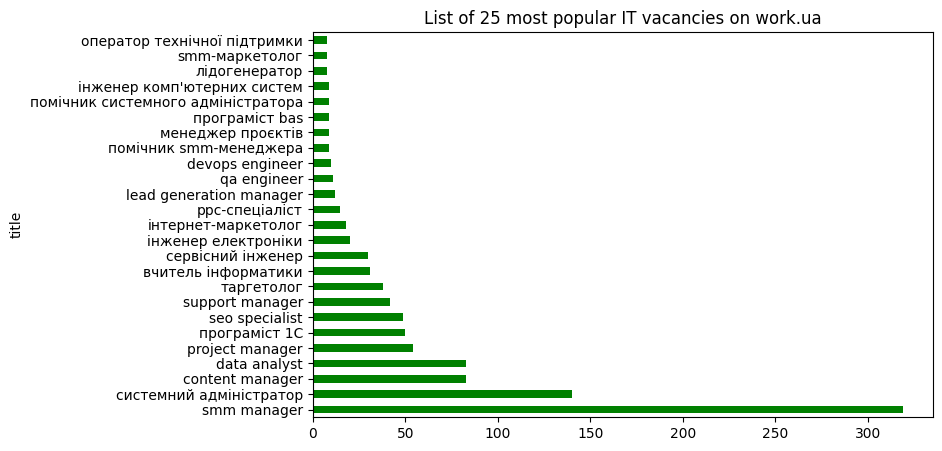

In [59]:
job_counts.head(25).plot(kind='barh', figsize=(8,5), color='green')
plt.title(f"List of 25 most popular IT vacancies on work.ua", fontsize=12)

#### Analysis of Top-25 IT Job Titles and Salaries
First, it extracts all job titles from the dataset, removes missing values, and ranks them by frequency. The top 25 most common titles are selected. 
Next, for each popular job title, the minimum and maximum values are calculated for both “salary from” and “salary up to.” 

In [60]:
# Top 25
all_jobs = df_jobs["title"].explode().dropna()
all_jobs = all_jobs.value_counts()
top_titles = all_jobs.head(25).index.tolist()

# only with 'salary'
df_clean = df_jobs.dropna(subset=["salary from", "salary up to"])
df_top = df_clean[df_clean["title"].isin(top_titles)]

# min & max on each 'title' (job)
df_range = (
    df_top.groupby("title")[["salary from", "salary up to"]]
    .agg(["min", "max"])
    .reset_index()
)
df_range.columns = ["title", "salary_from_min", "salary_from_max", "salary_to_min", "salary_to_max"]


#### Visualization of Salary Ranges for Top IT Vacancies
To compare min and max salary ranges for the 25 most frequent IT job titles:
- The first bar segment (`salary_from_min`) is plotted in **light blue**, representing the base salary.
- The second bar segment (`delta`) is stacked to the right of the first, shown in **salmon**, indicating the range up to the maximum salary.
Result: A comprehensive visual summary of salary variability across popular IT roles.

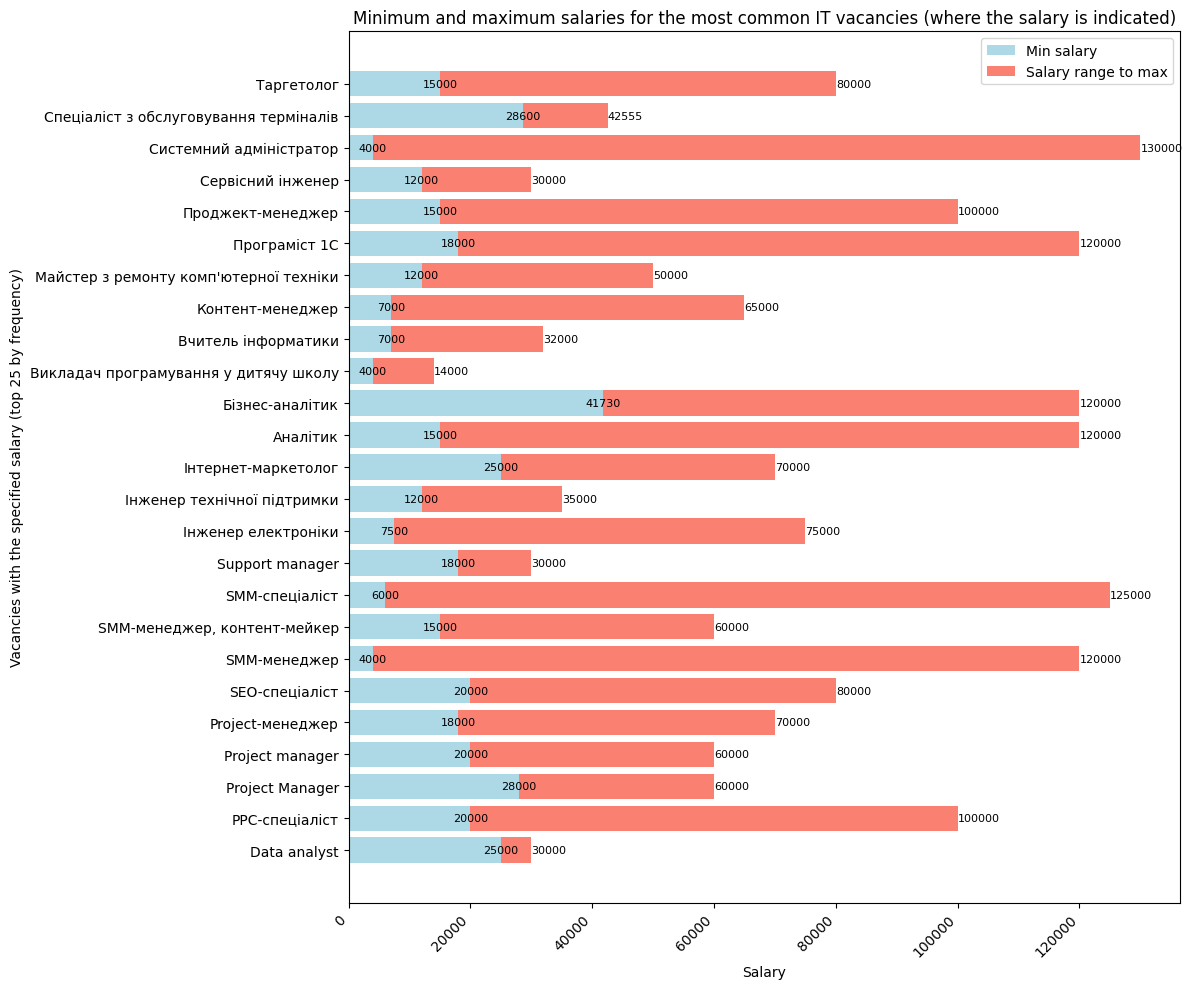

In [61]:
df_range["delta"] = df_range["salary_to_max"] - df_range["salary_from_min"]

plt.figure(figsize=(12,10))

plt.barh(df_range["title"],
         df_range["salary_from_min"],
         color="lightblue", label="Min salary")

plt.barh(df_range["title"],
         df_range["delta"],
         left=df_range["salary_from_min"],
         color="salmon", label="Salary range to max")

for i in range(len(df_range)):
    plt.text(df_range["salary_from_min"].iloc[i], i,
             f"{int(df_range['salary_from_min'].iloc[i])}", va="center", ha="center", color="black", fontsize=8)
    plt.text(df_range["salary_to_max"].iloc[i], i,
             f"{int(df_range['salary_to_max'].iloc[i])}", va="center", ha="left", color="black", fontsize=8)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Salary")
plt.ylabel("Vacancies with the specified salary (top 25 by frequency)")
plt.title("Minimum and maximum salaries for the most common IT vacancies (where the salary is indicated)")
plt.legend()
plt.tight_layout()
plt.show()


#### Project topic: Skill analysis for specific developer roles.
While the DataFrame `df_jobs` allows you to analyze skills by various categories,
the main goal of the project is to **collect and visualize skills** (e.g. **Python developer**). To do this, we will narrow the search to jobs **named by keywords retrieved from `words.json`**.

#### Load and Rename Refined Job Requirements Dataset
Result: `df_refine_reqs` now holds the refined job requirements, ready for analysis or merging

In [62]:
refine_path = os.path.join(data_path, "refine_reqs.jl")
df_refine_reqs = pd.read_json(refine_path, lines=True)
df_refine_reqs.rename(columns={"job_id": "rejob_id"}, inplace=True)
df_refine_reqs

,rejob_id,requirements
0,6600400,"[Jenkins, linux, Python, GO, PostgreSQL, розро..."
1,6359887,"[SQL, REST, JS, Next.js, розробка, REST API, T..."
2,6903136,"[SQL, Python, Аналітичне мислення, PostgreSQL,..."
3,6779263,"[CSS, AI, Стабільність, ACF, JS, jQuery, Marke..."
4,6832717,"[GitHub, GoLang, Golang, AWS, English, Docker,..."
...,...,...
435,5731607,"[Програмування, HTTP, Python, Java]"
436,6921007,"[Уважність, Стресостійкість, Знання теорії тес..."
437,6715540,"[Playwright, GitHub, Python, розробка, GitLab,..."
438,6886621,"[Уважність, SQL, Python, API, AI, Google Sheet..."


#### Integrating Refined Job Requirements into Main Dataset
This code integrates detailed job requirements into the main `df_jobs` DataFrame and prepares a subset of merged data: only matching jobs get enriched requirement details.
Creates `df_refine_only`, a dataset where refined requirements are available alongside other job info.

In [63]:
reqs_map = df_refine_reqs.set_index("rejob_id")["requirements"]
df_jobs.loc[df_jobs["job_id"].isin(reqs_map.index), "requirements"] = df_jobs["job_id"].map(reqs_map)

df_refine_only = df_jobs.merge(df_refine_reqs, left_on="job_id", right_on="rejob_id")

#### Final Cleanup and Renaming of Refined Job Dataset
This final step polishes the merged `df_refine_only` dataset for clearer structure and usability

In [64]:
df_refine_only.drop(columns=["requirements_x", "rejob_id"], inplace=True)
df_refine_only.rename(columns={"requirements_y": "skills"}, inplace=True)
df_refine_only

,job_id,title,company,location,conditions,lenguas,salary from,salary up to,salary conditions,skills
0,6830785,Electronics Design Engineer,Renesas Electronics;IT; 50-250 співробітників,NaN,Неповна зайнятість. Також готові взяти людину ...,NaN,NaN,NaN,NaN,"[Python, SolidWorks, FPGA, UART, Motion, digit..."
1,4990187,Python developer,Stake4Cake;IT,NaN,Повна зайнятість. Також готові взяти студента....,Англійська — середній,50000.0,100000.0,+ бонуси,"[linux, Python, Rust, розробка, Grafana, Puppe..."
2,6684904,Technical Business Analyst (Middle),"Platon;Фінанси, банки, страхування; 50-250 спі...",Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років.,NaN,NaN,NaN,За результатами співбесіди,"[JavaScript, JSON, REST, Робота в команді, Мод..."
3,4495770,Викладач у школу робототехніки та програмування,"Robocode;Освіта, наука; 250-1000 співробітників",NaN,Неповна зайнятість. Також готові взяти студента.,NaN,11000.0,17000.0,З.п. залежить від кількості проведених пар на...,"[Scratch, Програмування, Python]"
4,6888364,DevOps engineer,RocketUp;IT; 10-50 співробітників,Дистанційна робота,"Повна зайнятість, неповна зайнятість. Досвід р...",NaN,NaN,NaN,NaN,"[Самостійність, AWS, Agile, Відповідальність, ..."
...,...,...,...,...,...,...,...,...,...,...
435,6876619,Python Developer (Odoo),NarsCars;Автобізнес та автосервіс; 10-50 співр...,Дистанційна робота,"Повна зайнятість, неповна зайнятість. Також го...",NaN,NaN,NaN,NaN,"[JS, LESS, Python]"
436,6702865,Інженер-електронщик,UNM;Машинобудування,NaN,Повна зайнятість. Також готові взяти людину з ...,NaN,NaN,NaN,NaN,"[ArduPilot, linux, Python, Робота в команді, M..."
437,5631321,Фінансовий аналітик даних,"Meest;Транспорт, логістика; більше 1000 співро...",NaN,Повна зайнятість. Досвід роботи від 2 років. В...,NaN,NaN,NaN,NaN,"[Оптимізація бізнес-процесів, SQL, Моделювання..."
438,6911866,PHP developer,"Мороз В.Ю., ФОП , Агенція;Пошук персоналу, HR;...",Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років.,Українська — вище середнього,NaN,NaN,NaN,"[SQL, REST, linux, cron, Англійська, REST API,..."


Accessing Refined Skills Data

In [65]:
df_refine_only["skills"]

0      [Python, SolidWorks, FPGA, UART, Motion, digit...
1      [linux, Python, Rust, розробка, Grafana, Puppe...
2      [JavaScript, JSON, REST, Робота в команді, Мод...
3                       [Scratch, Програмування, Python]
4      [Самостійність, AWS, Agile, Відповідальність, ...
                             ...                        
435                                   [JS, LESS, Python]
436    [ArduPilot, linux, Python, Робота в команді, M...
437    [Оптимізація бізнес-процесів, SQL, Моделювання...
438    [SQL, REST, linux, cron, Англійська, REST API,...
439    [REST, JS, Самостійність, Python, розробка, Po...
Name: skills, Length: 440, dtype: object

#### Top 25 Most Frequent Skills in Refined IT Job Requirements
 Result: A ranked Series of the most in-demand IT skills from your dataset.

In [67]:
all_skills = df_refine_only["skills"].explode().dropna()
skill_counts = all_skills.value_counts()
skill_counts[:25]

skills
Python              304
API                 191
розробка            163
REST                147
REST API            132
Git                 118
Програмування       116
SQL                 105
JavaScript           91
Docker               85
PostgreSQL           82
JS                   82
CI/CD                79
HTML                 75
linux                74
CSS                  71
Відповідальність     68
MySQL                67
google               58
PHP                  56
React                55
AI                   54
AWS                  48
BASH                 47
Англійська           46
Name: count, dtype: int64

#### Prepare Keyword List
This block reads a list of keywords to display focused search words on graphs.

In [68]:
words_path = os.path.join(data_path, "words.json")
words = pd.read_json(words_path)
words_to_title = words.iloc[:, 0].tolist()
words_to_title = " | ".join(words_to_title)
words_to_title

'Python | Django | REST API'

#### Visualization of Top 25 Skills in Relevant Vacancies
Creates a horizontal bar chart displaying the frequency of the top 25 most in-demand skills from refined job  with requirements that in  `words.json`.

Text(0.5, 1.0, "Frequency of skills in vacancies requiring knowledge of 'Python | Django | REST API' (on work.ua)")

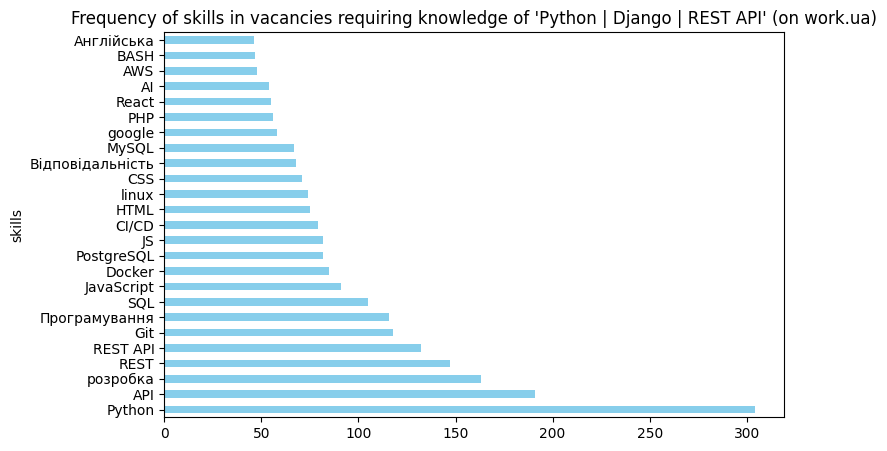

In [69]:
skill_counts.head(25).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title(f"Frequency of skills in vacancies requiring knowledge of '{words_to_title}' (on work.ua)", fontsize=12)

#### Skill Normalization Using Mapping Dictionary
##skill-normalization-using
This snippet standardizes skill names within a DataFrame using a custom mapping dictionary for more consistent analysis.
To unify different representations of the same skill (e.g. `'JS'`, `'JavaScript'`; `'English'`, `'Англійська мова'`). Helps improve the accuracy of skill frequency counts and visualizations.
_(requires manual setup)_

In [115]:
skill_mapping = {
    'JS': 'JavaScript',
    'google': 'Google',
    'Англійська мова': 'Англійська',
    'English': 'Англійська',
    'Знання SQL': 'SQL',
    'Programming': 'Програмування',
    'Системи безпеки': 'Security Systems',
    'Design': 'Дизайн',
    'stm32': 'STM32',
    'Розробка ПЗ': 'Розробка',
    'Розробка API': 'Розробка',
    'Програмування': 'Програмування',
    'розробка': 'Розробка',
    'Тестування': 'Тестування',
    'API': 'REST API',
    'linux': 'Linux',
    'GitHub Actions': 'GitHub',
    'Аналітичне мислення': 'Аналітичні здібності',
    'електроніка': 'Електроніка',
    'nginx': 'Nginx',
    'support': 'Support',
    'Ведення': 'Support',
    'Responsibility': 'Відповідальність',
}

df_refine_only['skills'] = df_refine_only['skills'].apply(
    lambda skills: [skill_mapping.get(s.strip(), s.strip()) for s in skills]
)
df_refine_only['skills']

0      [Python, SolidWorks, FPGA, UART, Motion, digit...
1      [Linux, Python, Rust, Розробка, Grafana, Puppe...
2      [JavaScript, JSON, REST, Робота в команді, Мод...
3                       [Scratch, Програмування, Python]
4      [Самостійність, AWS, Agile, Відповідальність, ...
                             ...                        
435                           [JavaScript, LESS, Python]
436    [ArduPilot, Linux, Python, Робота в команді, M...
437    [Оптимізація бізнес-процесів, SQL, Моделювання...
438    [SQL, REST, Linux, cron, Англійська, REST API,...
439    [REST, JavaScript, Самостійність, Python, Розр...
Name: skills, Length: 440, dtype: object

Text(0.5, 1.0, "Frequency of skills in vacancies requiring knowledge of 'Python | Django | REST API' (on work.ua)")

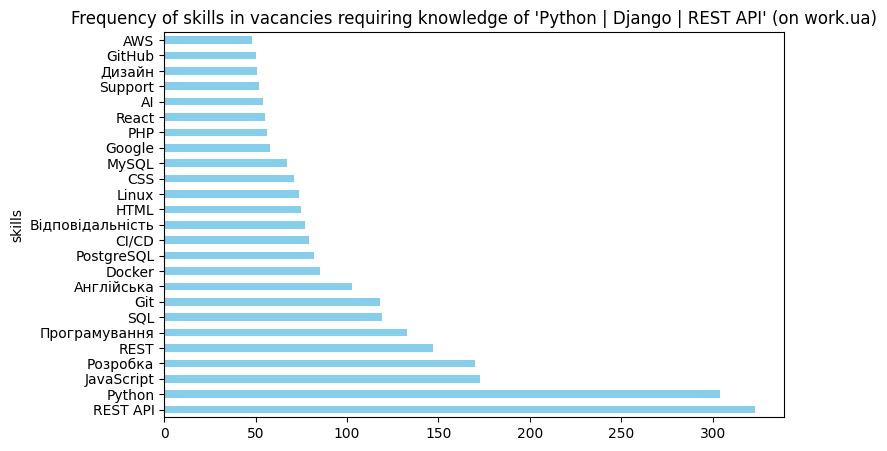

In [116]:
all_skills = df_refine_only["skills"].explode().dropna()
skill_counts = all_skills.value_counts()
skill_counts.head(25).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title(f"Frequency of skills in vacancies requiring knowledge of '{words_to_title}' (on work.ua)", fontsize=12)


####  Next Step: Skill Categorization
This version looks cleaner already, but it’s still not very informative in terms of the types of skills.  
To improve clarity and deliver more meaningful insights, I plan to **categorize the skills** into three separate groups:
- **Technical Skills**
- **Soft Skills**
- **General/Other Skills**

#### Skill Classification and Integration

In [126]:
classified_df = df_refine_only["skills"].apply(classify_skills)
df_refine_only = pd.concat([df_refine_only, classified_df], axis=1)
df_refine_only


,job_id,title,company,location,conditions,lenguas,salary from,salary up to,salary conditions,skills,Tech,Soft,General,Not_classified
0,6830785,Electronics Design Engineer,Renesas Electronics;IT; 50-250 співробітників,NaN,Неповна зайнятість. Також готові взяти людину ...,NaN,NaN,NaN,NaN,"[Python, SolidWorks, FPGA, UART, Motion, digit...","[Python, FPGA, UART, I2C, Hardware]",[],"[digital, Engineering, Дизайн]","[SolidWorks, Motion, SPI, analog]"
1,4990187,Python developer,Stake4Cake;IT,NaN,Повна зайнятість. Також готові взяти студента....,Англійська — середній,50000.0,100000.0,+ бонуси,"[Linux, Python, Rust, Розробка, Grafana, Puppe...","[Linux, Python, Grafana]",[],[Розробка],"[Rust, Puppeteer]"
2,6684904,Technical Business Analyst (Middle),"Platon;Фінанси, банки, страхування; 50-250 спі...",Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років.,NaN,NaN,NaN,За результатами співбесіди,"[JavaScript, JSON, REST, Робота в команді, Мод...","[JavaScript, JSON, REST API, REST API, Jira, P...",[Робота в команді],"[REST, Моделювання]","[BPMN, Confluence]"
3,4495770,Викладач у школу робототехніки та програмування,"Robocode;Освіта, наука; 250-1000 співробітників",NaN,Неповна зайнятість. Також готові взяти студента.,NaN,11000.0,17000.0,З.п. залежить від кількості проведених пар на...,"[Scratch, Програмування, Python]","[Scratch, Python]",[],[Програмування],[]
4,6888364,DevOps engineer,RocketUp;IT; 10-50 співробітників,Дистанційна робота,"Повна зайнятість, неповна зайнятість. Досвід р...",NaN,NaN,NaN,NaN,"[Самостійність, AWS, Agile, Відповідальність, ...","[AWS, Docker, BASH, CI/CD, Nginx, Python, Zabb...","[Самостійність, Відповідальність, Аналітичні з...",[Agile],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,6876619,Python Developer (Odoo),NarsCars;Автобізнес та автосервіс; 10-50 співр...,Дистанційна робота,"Повна зайнятість, неповна зайнятість. Також го...",NaN,NaN,NaN,NaN,"[JavaScript, LESS, Python]","[JavaScript, Python]",[],[],[LESS]
436,6702865,Інженер-електронщик,UNM;Машинобудування,NaN,Повна зайнятість. Також готові взяти людину з ...,NaN,NaN,NaN,NaN,"[ArduPilot, Linux, Python, Робота в команді, M...","[ArduPilot, Linux, Python]",[Робота в команді],[Програмування],"[Mission Planner, Читання електричних схем, Фо..."
437,5631321,Фінансовий аналітик даних,"Meest;Транспорт, логістика; більше 1000 співро...",NaN,Повна зайнятість. Досвід роботи від 2 років. В...,NaN,NaN,NaN,NaN,"[Оптимізація бізнес-процесів, SQL, Моделювання...","[SQL, Python, DAX, Power Pivot, Power Query]",[],"[Моделювання, Розробка, Програмування, математ...","[Оптимізація бізнес-процесів, Програмування 1С]"
438,6911866,PHP developer,"Мороз В.Ю., ФОП , Агенція;Пошук персоналу, HR;...",Дистанційна робота,Повна зайнятість. Досвід роботи від 2 років.,Українська — вище середнього,NaN,NaN,NaN,"[SQL, REST, Linux, cron, Англійська, REST API,...","[SQL, Linux, cron, REST API, REST API, PHP, Gi...",[Англійська],"[REST, Проєктування]",[Маркетинг]


Heads-up: If you accidentally run the previous code twice. In that case, this line would output: <class 'pandas.core.frame.DataFrame'>.
Why it matters: Code written for a Series may break or behave unexpectedly if the object is actually a DataFrame. Must be:  <class 'pandas.core.series.Series'>.

If you see the wrong format, uncomment the next line, remove the columns (they are doubled) and go back to the previous point: **Skill Classification and Integration**. _Don't forget to comment again after_

In [127]:

# df_refine_only = df_refine_only.drop(columns=["Tech", "Soft", "General", "Not_classified"])	
print(type(df_refine_only["Tech"])) 

<class 'pandas.core.series.Series'>


#### Skill Count Extraction from DataFrame Columns
This code processes four columns in the `df_refine_only` DataFrame that contain categorized skill sets.  

In [128]:
tech_counts = df_refine_only["Tech"].explode().value_counts()
soft_counts = df_refine_only["Soft"].explode().value_counts()
general_counts = df_refine_only["General"].explode().value_counts()
not_class_counts = df_refine_only["Not_classified"].explode().value_counts()

In [129]:
not_class_counts[:25]

Not_classified
Confluence                  15
Електроніка                 12
Firebase                    12
Symfony                     11
scss                         9
n8n                          8
BPMN                         8
webpack                      6
Express.js                   6
gRPC                         5
Google Meet                  5
Android Studio               5
Adobe                        5
AppsFlyer                    5
SASS                         5
Android SDK                  5
Shopify                      5
Entity Framework             5
Slack                        5
Reliability                  5
React Native                 5
Composer                     4
Zapier                       4
Адміністрування серверів     4
Spring Boot                  4
Name: count, dtype: int64

### Visualizing Skill Frequencies by Category.
The following code creates a 2x2 grid of horizontal bar charts to visualize the top 25 skills in each category found in vacancies related to `words.json` on work.ua.

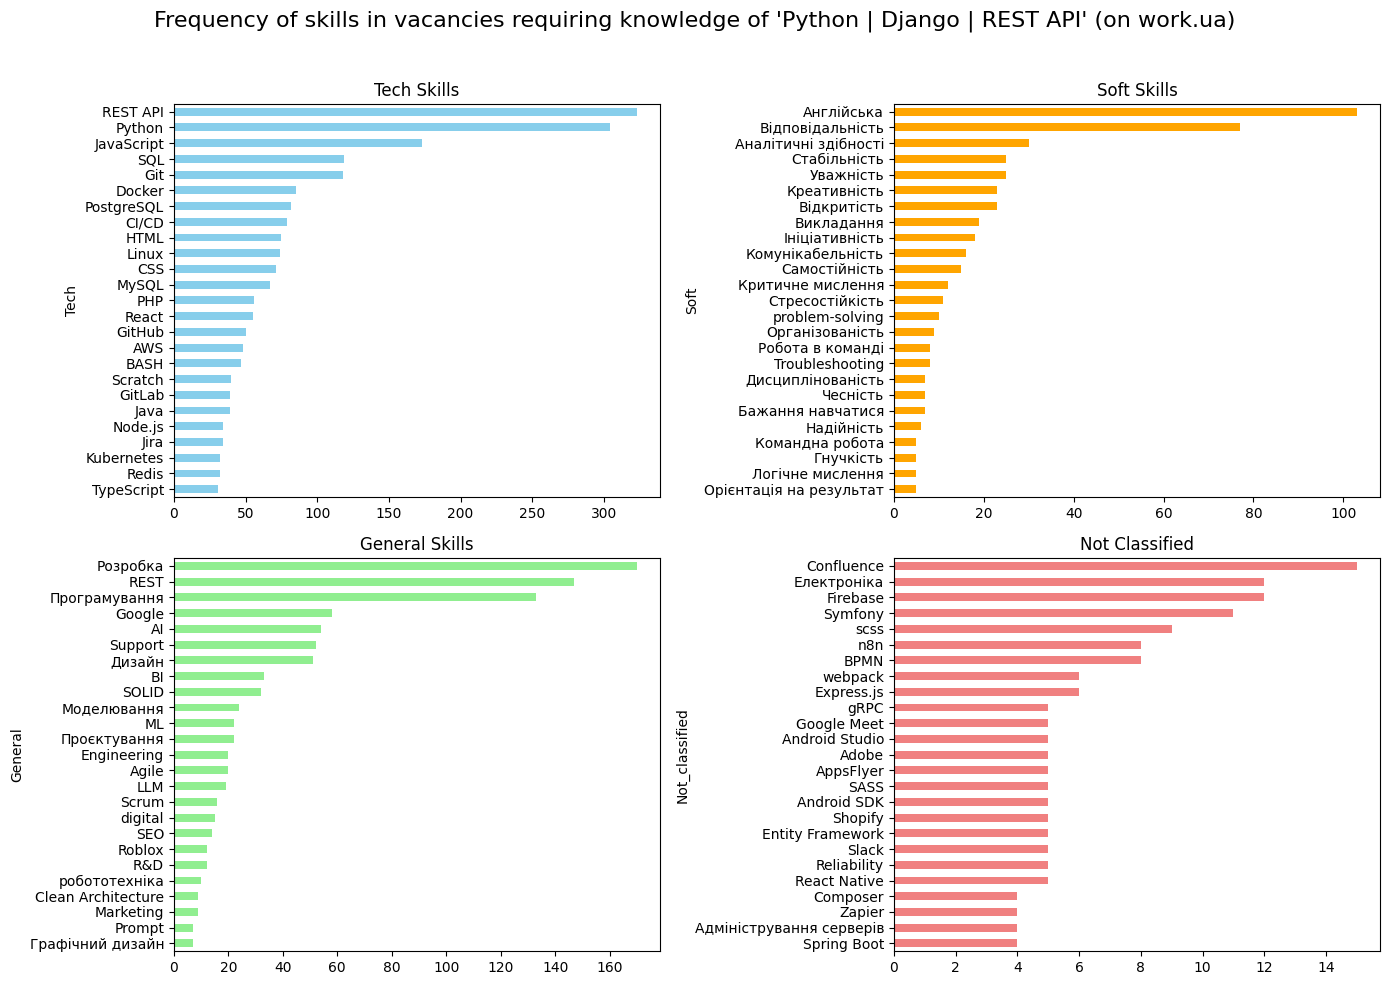

In [130]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f"Frequency of skills in vacancies requiring knowledge of '{words_to_title}' (on work.ua)", fontsize=16)

# Tech-skills
tech_counts.head(25).plot(kind='barh', ax=axes[0,0], color='skyblue', title='Tech Skills')
axes[0,0].invert_yaxis()

# Soft-skills
soft_counts.head(25).plot(kind='barh', ax=axes[0,1], color='orange', title='Soft Skills')
axes[0,1].invert_yaxis()

# General-skills
general_counts.head(25).plot(kind='barh', ax=axes[1,0], color='lightgreen', title='General Skills')
axes[1,0].invert_yaxis()

# Not_classified
not_class_counts.head(25).plot(kind='barh', ax=axes[1,1], color='lightcoral', title='Not Classified')
axes[1,1].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Skill Categorization Note.
We pay special attention to the listed skills, as it's possible that some of them may have been accidentally assigned to the wrong category. Go to **Skill Normalization Using Mapping Dictionary**.
However, our main focus is on the **"Not Cclassified"** skills.
If we notice that certain skills appear frequently in this category—and they clearly belong to one of the known classifications (e.g. Tech, Soft, or General)—then it's recommended to reassign them to the appropriate skill category for a more accurate qualification mapping.

In [131]:
not_class_counts[0:25]

Not_classified
Confluence                  15
Електроніка                 12
Firebase                    12
Symfony                     11
scss                         9
n8n                          8
BPMN                         8
webpack                      6
Express.js                   6
gRPC                         5
Google Meet                  5
Android Studio               5
Adobe                        5
AppsFlyer                    5
SASS                         5
Android SDK                  5
Shopify                      5
Entity Framework             5
Slack                        5
Reliability                  5
React Native                 5
Composer                     4
Zapier                       4
Адміністрування серверів     4
Spring Boot                  4
Name: count, dtype: int64